#Game

In [1]:
import random
import matplotlib.pyplot as plt
import statistics as st

In [2]:
class Game:
    def __init__(self, player1, player2):
        self.solt_player = player1
        self.comp_player = player2
        self.the_winner = self.solt_player
        self.winner = False
        self.current_player = random.choice([self.comp_player, self.solt_player])
        
    def start(self):
        while not self.winner:
            self.current_player.turn(self.solt_player.record_score())
            self.check_winner(self.current_player)
            self.switch_players(self.current_player)
        return self.the_winner
    
    def check_winner(self, cur_pl):
        if cur_pl.current_score < 100:
            self.winner = False
        else:
            self.winner = True
            self.the_winner = cur_pl
            
    def switch_players(self, cur_pl):
        if cur_pl == self.solt_player:
            self.current_player = self.comp_player
        else:
            self.current_player = self.solt_player
            
    def reset(self):
        self.solt_player.reset()
        self.comp_player.reset()


#Dice

In [3]:
class Die:
    def roll(self):
        return random.randint(1,6)

#Base Player Class

In [4]:
class Base_player:
    def __init__(self):
        self.current_score = 0
        self.wins = 0
        self.die = Die()
        
    def reset(self):
        self.current_score = 0
        
    def turn(self, num_of_turns=1):
        turn_score = 0
        roll = self.die.roll()
        if roll == 1:
            turn_score = 0
        else:
            turn_score += roll
        self.current_score += turn_score
        
    def record_score(self):
        return self.current_score

#Solitaire Player

In [5]:
class Roll_player(Base_player):
    def turn(self, opp_score):
        turn_score = 0
        while turn_score < 10:
            roll = self.die.roll()
            if roll == 1:
                turn_score = 0
                break
            else:
                turn_score += roll
        self.current_score += turn_score

#Competitive Player

In [6]:
class Comp_player(Base_player):
    def turn(self, opp_score=0):
        self.opp_score = opp_score
        turn_score = 0
        if self.current_score >= 90:
            i = 3
            while i > 0:
                roll = self.die.roll()
                if roll == 1:
                    turn_score = 0
                else:
                    turn_score += roll
                if self.current_score + turn_score > 100:
                    break
                i -= 1
                
        elif self.current_score > 75 and self.opp_score > 95:
            while turn_score < 25:
                roll = self.die.roll()
                if roll == 1:
                    turn_score = 0
                    break
                else:
                    turn_score += roll
                if self.current_score + turn_score > 100:
                    break
        else:
            while turn_score < 20:
                roll = self.die.roll()
                if roll == 1:
                    turn_score = 0
                    break
                else:
                    turn_score += roll
        self.current_score += turn_score

#Simulation

In [8]:
class Simulation:
    def __init__(self):
        self.p1 = Roll_player()
        self.p2 = Comp_player()
        self.p1_wins = 0
        self.p2_wins = 0
        
    def run_simulation(self, n):
        num_rounds = n
        while num_rounds > 0:
            game1 = Game(p1, p2)
            winner = game1.start()
            if type(winner) == Roll_player:
                self.p1_wins += 1
            else:
                self.p2_wins += 1
            game1.reset()
            num_rounds -= 1
        results = (self.p1_wins, self.p2_wins)
        return results

In [16]:
def get_data(num_sims):
    sims = num_sims
    results_list = []
    while sims > 0:
        sim = Simulation()
        results_list.append(sim.run_simulation(100))
        sims -= 1
    return results_list

results = get_data(500)

In [28]:
total_wins = (sum([pair[0] for pair in results]), sum([pair[1] for pair in results]))
comp_win_ratios = [pair[1]/100 for pair in results]
solt_win_ratios = [pair[0]/100 for pair in results]

In [18]:
%matplotlib inline

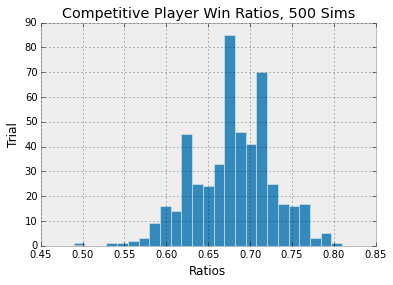

In [22]:
plt.hist(comp_win_ratios, bins=25)
plt.xlabel("Ratios")
plt.ylabel("Trial")
plt.title("Competitive Player Win Ratios, 500 Sims")
plt.style.use('bmh')
plt.show()

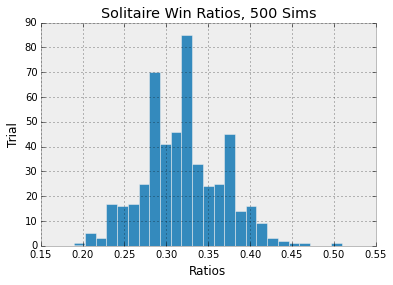

In [23]:
plt.hist(solt_win_ratios, bins=25)
plt.xlabel("Ratios")
plt.ylabel("Trial")
plt.title("Solitaire Win Ratios, 500 Sims")
plt.style.use('bmh')
plt.show()

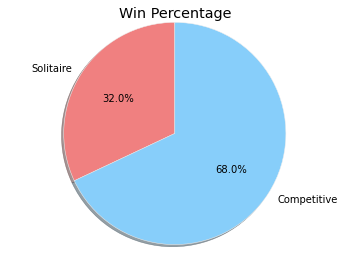

In [27]:
pl1 = 10 * round((total_wins[0]/50000),2)
pl2 = 10 * round((total_wins[1]/50000),2)

# The slices will be ordered and plotted counter-clockwise.
labels = 'Solitaire', 'Competitive'
sizes = [pl1, pl2]
colors = ['lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title("Win Percentage")
plt.style.use('bmh')

plt.show()